<a href="https://colab.research.google.com/github/joew2k/WQU_ml_fin/blob/main/Linear_Models_in_TensorFlow_Timing_Factors_and_Smart_Beta_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [21]:
route = "https://raw.githubusercontent.com/joew2k/WQU_ml_fin/main/10_Portfolios_Prior_12_2_Daily.csv"
# Read the csv file again
df = pd.read_csv(route, index_col=1)
# format the date index
df.index = pd.to_datetime(df.index, format="%Y%m%d")
# Build the MOM stategy: Log "Hi PRIOR" and short "Lo PRIOR"
df["Mom"] = df["Hi PRIOR"] - df["Lo PRIOR"]
df.head()

,Unnamed: 0,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR,Mom
1926-11-03,1,-0.12,0.60,-0.09,0.30,-0.51,-0.22,-0.12,0.50,0.13,1.28,1.40
1926-11-04,2,0.65,1.82,1.34,0.61,1.01,0.64,0.82,0.44,0.48,0.40,-0.25
1926-11-05,3,-0.84,-0.77,-0.22,-0.15,-0.02,-0.02,-0.07,0.36,0.20,0.08,0.92
1926-11-06,4,1.03,0.28,0.24,0.40,0.19,0.64,0.10,0.10,0.39,-0.68,-1.71
1926-11-08,5,-0.06,0.11,1.78,0.28,0.36,0.23,0.30,1.17,0.58,-0.18,-0.12


## Inputs and Outputs

In [22]:
df["Ret"] = df["Mom"]
df["Ret10_MOMi"] = df["Mom"].rolling(10).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret25_MOMi"] = df["Mom"].rolling(25).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret60_MOMi"] = df["Mom"].rolling(60).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret120_MOMi"] = df["Mom"].rolling(120).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret240_MOMi"] = df["Mom"].rolling(240).apply(lambda x: np.prod(1 + x/100) - 1)

df["Ret10_hi"] = df["Hi PRIOR"].rolling(10).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret25_hi"] = df["Hi PRIOR"].rolling(25).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret60_hi"] = df["Hi PRIOR"].rolling(60).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret120_hi"] = df["Hi PRIOR"].rolling(120).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret240_hi"] = df["Hi PRIOR"].rolling(240).apply(lambda x: np.prod(1 + x/100) - 1)

df["Ret10_Low"] = df["Lo PRIOR"].rolling(10).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret25_Low"] = df["Lo PRIOR"].rolling(25).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret60_Low"] = df["Lo PRIOR"].rolling(60).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret120_Low"] = df["Lo PRIOR"].rolling(120).apply(lambda x: np.prod(1 + x/100) - 1)
df["Ret240_Low"] = df["Lo PRIOR"].rolling(240).apply(lambda x: np.prod(1 + x/100) - 1)

df["Ret60"] = df["Ret60_MOMi"].shift(-60)
df = df.dropna()
df = df.drop(
    [
        "Lo PRIOR",
        "PRIOR 2",
        "PRIOR 3",
        "PRIOR 4",
        "PRIOR 5",
        "PRIOR 6",
        "PRIOR 7",
        "PRIOR 8",
        "PRIOR 9",
        "Hi PRIOR",
        "Mom",
        "Unnamed: 0"

    ],
    axis=1,
)

## Train-Test Samples and Scaling

In [24]:
from sklearn.model_selection import train_test_split

df.reset_index(inplace=True)
df.rename(columns={"index": "Date"}, inplace=True)

df.head()

,Date,Ret,Ret10_MOMi,Ret25_MOMi,Ret60_MOMi,Ret120_MOMi,Ret240_MOMi,Ret10_hi,Ret25_hi,Ret60_hi,Ret120_hi,Ret240_hi,Ret10_Low,Ret25_Low,Ret60_Low,Ret120_Low,Ret240_Low,Ret60
0,1927-08-19,1.60,-0.007189,-0.011632,0.029566,0.201590,0.275852,-0.003897,0.010958,0.031462,0.181792,0.458303,0.003376,0.021960,-0.000112,-0.021026,0.125174,0.102616
1,1927-08-20,0.74,-0.016077,-0.002022,0.028443,0.191185,0.267548,-0.006644,0.027704,0.043832,0.192865,0.458015,0.009704,0.028920,0.013091,-0.002974,0.132384,0.087730
2,1927-08-22,0.71,-0.008596,0.002957,0.033884,0.216675,0.279747,-0.002775,0.025256,0.054955,0.209346,0.459903,0.005975,0.021349,0.018498,-0.010311,0.123046,0.081898
3,1927-08-23,0.97,0.033152,0.008149,0.038926,0.213431,0.280381,0.031562,0.018638,0.056751,0.207897,0.459320,-0.001583,0.009427,0.015219,-0.008810,0.122026,0.040216
4,1927-08-24,0.91,0.061988,0.007949,0.066728,0.225576,0.314510,0.070620,0.015491,0.086507,0.208018,0.470046,0.007666,0.006483,0.016347,-0.018610,0.101036,0.036711


In [25]:
df.reset_index(inplace=True, drop=True)
ts = int(0.4 * len(df)) # Number of observations in the test sample
split_time = len(df) - ts # From this data we are in the test sample
test_time = df.iloc[split_time:, 0:1].values # Keep the test sample dates
Ret_vector = df.iloc[split_time:, 1:2].values
df.tail()

,Date,Ret,Ret10_MOMi,Ret25_MOMi,Ret60_MOMi,Ret120_MOMi,Ret240_MOMi,Ret10_hi,Ret25_hi,Ret60_hi,Ret120_hi,Ret240_hi,Ret10_Low,Ret25_Low,Ret60_Low,Ret120_Low,Ret240_Low,Ret60
24887,2022-04-27,1.94,0.038712,0.108592,0.188628,0.028458,0.131028,-0.086925,-0.087599,-0.061417,-0.303205,-0.152330,-0.126017,-0.188592,-0.244155,-0.353731,-0.285341,-0.041617
24888,2022-04-28,-0.74,0.043654,0.089926,0.182433,0.051878,0.122995,-0.074019,-0.057657,-0.052085,-0.266682,-0.128722,-0.117822,-0.147683,-0.232796,-0.335072,-0.260362,-0.000872
24889,2022-04-29,0.41,0.029505,0.081845,0.101272,0.053557,0.125124,-0.097348,-0.111744,-0.095652,-0.290164,-0.156369,-0.127962,-0.190862,-0.210333,-0.357485,-0.285294,-0.044455
24890,2022-05-02,-2.61,-0.025906,0.030122,0.050366,0.009404,0.110528,-0.088034,-0.095037,-0.050230,-0.290025,-0.124292,-0.069327,-0.134776,-0.130492,-0.330029,-0.249282,-0.008054
24891,2022-05-03,2.04,0.025552,0.071167,0.111819,0.041873,0.120300,-0.081955,-0.084083,-0.045039,-0.272333,-0.133964,-0.109307,-0.157715,-0.172954,-0.334860,-0.264272,-0.010970


In [26]:
# split data into test and train and ensure shuffle = False as these would negatively impact the chronological order
Xdf, ydf = df.iloc[:, 2:-1], df.iloc[:, -1]
X = Xdf.astype("float32")
y = ydf.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, shuffle=False
) # It is important to keep "shuffle=False"
n_features = X_train.shape[1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14936, 15) (9956, 15) (14936,) (9956,)


## Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)

mean_ret = np.mean(y_train) # useful to compute the performance = R2
scaler_output = MinMaxScaler(feature_range=(-1, 1))
# Reshape y_train, y_test
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
scaler_output.fit(y_train)
y_train = scaler_output.transform(y_train)
y_test = scaler_output.transform(y_test)

## Modeling and Training

- Define the model and the number of layers: Do this with $ts.keras.layers.Dense(1)$ command
- Define learning rate: $10^{-5} = 0.00001$
- Define the optimizer to use: Adam
- Define the loss function: MSE

In [34]:
import tensorflow as tf
tf.random.set_seed(1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1))

hp_lr = 1e-5

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)
model.compile(optimizer=adam, loss="mean_squared_error")

In [35]:
# Fit the model on the training data
# Data(X, y): _X_tain, y_train
# number of epochs to train the model: Each epoch means "one lap around the training set examples" when the parameter are all update, in this case, use 50 epoch
# Batch (or minibatch) size: The size of the (mini) batch determines how many examples at a time we are\
#     going to consider in each iteration of our algorithm. usually, to improve efficiency of the process, a batch size of 32 is preffered
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
467/467 - 1s - loss: 0.1866 - 1s/epoch - 2ms/step
Epoch 2/50
467/467 - 1s - loss: 0.1735 - 805ms/epoch - 2ms/step
Epoch 3/50
467/467 - 1s - loss: 0.1613 - 753ms/epoch - 2ms/step
Epoch 4/50
467/467 - 1s - loss: 0.1500 - 786ms/epoch - 2ms/step
Epoch 5/50
467/467 - 1s - loss: 0.1396 - 624ms/epoch - 1ms/step
Epoch 6/50
467/467 - 1s - loss: 0.1300 - 527ms/epoch - 1ms/step
Epoch 7/50
467/467 - 1s - loss: 0.1212 - 522ms/epoch - 1ms/step
Epoch 8/50
467/467 - 1s - loss: 0.1130 - 516ms/epoch - 1ms/step
Epoch 9/50
467/467 - 1s - loss: 0.1055 - 536ms/epoch - 1ms/step
Epoch 10/50
467/467 - 1s - loss: 0.0987 - 520ms/epoch - 1ms/step
Epoch 11/50
467/467 - 1s - loss: 0.0924 - 526ms/epoch - 1ms/step
Epoch 12/50
467/467 - 1s - loss: 0.0868 - 543ms/epoch - 1ms/step
Epoch 13/50
467/467 - 1s - loss: 0.0817 - 525ms/epoch - 1ms/step
Epoch 14/50
467/467 - 1s - loss: 0.0772 - 514ms/epoch - 1ms/step
Epoch 15/50
467/467 - 1s - loss: 0.0732 - 531ms/epoch - 1ms/step
Epoch 16/50
467/467 - 1s - loss: 0.06

In [36]:
# Check model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Perfomance of Model



\
Now that we have trained our model parameters, let's check how our model predictive ability performs out of sample. We are going to check this in two ways:

- Measures of model fit (similar to the R-squared measure that we have already seen before).

- Performance of a trading strategy based on a model's predictions.

### ** Measure of Model Fit in Finance**

\
We already know that, in linear regression, a good measure of model in-sample fit is the $R^2$ measure. Just as a reminder, this is defined as:

\
$$
\begin{equation*}
R^2 = 1 - \frac{\sum (y - Xw)^2}{\sum (y - \bar{y})^2} = 1- \frac{SSE}{TSE}
\end{equation*}
$$

\
The in-sample $R^2$ will serve as a proxy of how good our model fits the training set examples. However, when constructing predictive models in finance, we are more interested in the performance out-of-sample. In this regard, Campbell and Thompson (2008) came out with a measure, $R^2_{OS}$, that captures the degree to which a predictive model is able to explain stock returns out-of-sample:

\
$$
\begin{equation*}
R^2_{OS} = 1 - \frac{\sum_{t=1}^T (r_t - \hat{r}_t)^2}{\sum_{t=1}^T (r_t - \bar{r}_t)^2}
\end{equation*}
$$

\
where $r_t$ is the actual return over period $t$, $\hat{r}_t$ is the predicted returns for $t$ using trained model parameters in $t-1$, and $\bar{r}_t$ is the mean historical return calculated over $t-1$. You can see more on this discussion in the Campbell and Thompson paper:


- Campbell, John Y., and Samuel B. Thompson. "Predicting Excess Stock Returns out of Sample: Can Anything Beat the Historical Average?" *The Review of Financial Studies*, vol. 21, no. 4, 2008, pp. 1509-1531, https://www.nber.org/papers/w11468.

\
Consequently, we will apply this out-of-sample $R^2$ measure to our framework to see how our linear regression model is able to predict momentum returns over the next $60$ days.

First, we will need to get the actual momentum $t+60$-day returns in the test sample, which requires un-transforming the scaled variable. Then, we will use the *model.predict()* feature to use the weights ($w$) that we obtained when training our model to calculate the predicted momentum returns in the test sample according to those weights. Similar to the previous case, we also need to de-scale our variables:

In [37]:
values = scaler_output.inverse_transform(y_test)

y_pred = model.predict(X_test)
y_pred = scaler_output.inverse_transform(y_pred)

312/312 [==============================] - 0s 1ms/step


In [38]:
y_pred.shape

(9956, 1)

In [46]:
def R2_campbell(y_true, y_pred, mean_ret):
    y_pred = y_pred.reshape((-1,))
    sse = sum((y_true - y_pred) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)
    return r2_score

R2_Campbell = R2_campbell(values.flatten(), y_pred.flatten(), mean_ret)

print("R2 (Campbell): ", R2_Campbell)

R2 (Campbell):  -0.3079471923463182


Model perform poorly

## Testing Model Performance Via Backtesting

In [48]:
df_predictions = pd.DataFrame(
    {
        "Date": test_time.flatten(),
        "pred": y_pred.flatten(),
        "Ret": (Ret_vector.flatten() / 100),
        "Values": values.flatten()
    }
)
df_predictions.tail()

,Date,pred,Ret,Values
9951,2022-04-27,0.118426,0.0194,-0.041617
9952,2022-04-28,0.109449,-0.0074,-0.000872
9953,2022-04-29,0.102855,0.0041,-0.044455
9954,2022-05-02,0.061418,-0.0261,-0.008054
9955,2022-05-03,0.091125,0.0204,-0.010970


In [49]:
df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%YYYY-%mm-%dd")
df = df_predictions
df.tail()

,Date,pred,Ret,Values
9951,2022-04-27,0.118426,0.0194,-0.041617
9952,2022-04-28,0.109449,-0.0074,-0.000872
9953,2022-04-29,0.102855,0.0041,-0.044455
9954,2022-05-02,0.061418,-0.0261,-0.008054
9955,2022-05-03,0.091125,0.0204,-0.010970


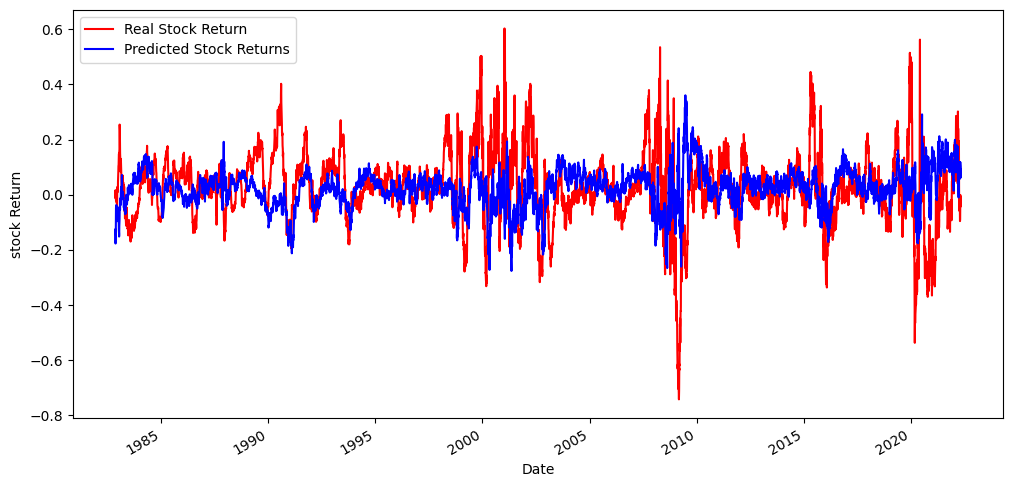

In [51]:
# Graphical plot of predictions (Predicted vs real 60-day returns)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df.plot(x="Date", y="Values", color="red", label="Real Stock Return", ax=ax)
df.plot(x="Date", y="pred", color="blue", label="Predicted Stock Returns", ax=ax)
plt.xlabel="Time"
plt.ylabel("stock Return")
plt.legend()
plt.show()

From the previous graph we can observe that, at times, the predicted versus real Mom returns overlap, indicating that our model has some kind of prediction power. But of course, other times, the two go in completely opposite directions, which is not a very good sign.

Next, we will perform **Backtesting** on a very simple strategy using the predicted returns:

- **Strategy**:

Our **strategy** will simply consist of going long on the Mom portfolio on a given day when the model predicts a positive return, and going short when the model predicts a negative one. Thus, if for a given day $d$ our model predicts a positive return, we would have gone long the previous day (at close prices) so that we will earn the Mom factor returns for that day $d$ (which we refer to as '*Ret*' in the DataFrame). Conversely, if the model predicts a negative return, we will go short the previous day so that we will earn minus day $d$ return ($-Ret_d$).

What we just described would be a classic long/short strategy. For comparison purposes, we also perform backtesting on a strategy that only goes long (omitting the short part in the previous strategy) and a Buy-and-hold strategy that simply invests in the Mom factor at the beginning of the test period and keeps the investment unaltered until the end of the period.

- **Backtesting**:

**Backtesting** is a very common way to evaluate a trading strategy. Intuitively, it consists of evaluating a trading strategy following the idea of '*how would I have done if I followed this strategy in a given period*'. For us, that period is the testing period. Following the strategy implies that at each point in time, we would be deciding with the information available just until that point in time. This is a very important condition we need to keep in mind because otherwise we would be contaminating our strategy and thus any inferences we draw on its validity.

\
Next, we calculate the positions that our strategy would keep each day in the backtest (that is 1 for long, -1 for short). By simply multiplying this *Positions* vector by the Mom factor daily returns (*Ret*), we can obtain the daily returns of our strategy. We can take a very similar approach to obtain daily returns of the long-only strategy.

Then, we calculate the cumulative returns of the different strategies (long/short, long-only, and buy-and-hold) using the *lambda* feature in Python, as well as the final values obtained for our investment by the end of the testing period:

In [55]:
df["Positions"] = df["pred"].apply(np.sign)
df["Strat_ret"] = df["Positions"].shift(1) * df["Ret"]
df["Positions_L"] = df["Positions"].shift(1)
df["Positions_L"][df["Positions_L"] == -1] = 0
df["Strat_ret_L"] = df["Positions_L"] * df["Ret"]
df["CumRet"] = df["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["CumRet_L"] = df["Strat_ret_L"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["bhRet"] = df["Ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)

Final_Return_L = np.prod(1 + df["Strat_ret_L"]) - 1
Final_Return = np.prod(1 + df["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df["Ret"]) - 1

print("Strat Return Long Only = ", Final_Return_L * 100, "%")
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return", Buy_Return * 100, "%")

<ipython-input-55-476cc8c3efda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positions_L"][df["Positions_L"] == -1] = 0


Strat Return Long Only =  7724.002662380837 %
Strat Return = 7783.744850532823 %
Buy and Hold Return 1909.8411102470113 %


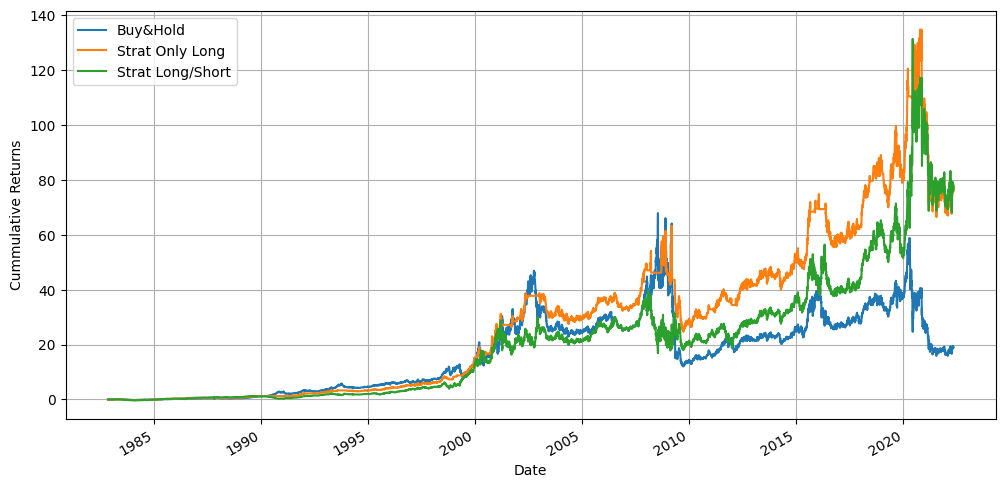

,Date,pred,Ret,Values,Positions,Strat_ret,Positions_L,Strat_ret_L,CumRet,CumRet_L,bhRet
count,9956,9956.000000,9956.000000,9956.000000,9956.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9956.000000
mean,2002-07-28 08:01:20.996384128,0.023315,0.000437,0.027431,0.393532,0.000573,0.696735,0.000505,21.064680,28.610221,16.782598
min,1982-11-05 00:00:00,-0.276639,-0.205800,-0.742601,-1.000000,-0.205800,0.000000,-0.205800,-0.318228,-0.254867,-0.203779
25%,1992-09-09 18:00:00,-0.009965,-0.005700,-0.032436,-1.000000,-0.005900,0.000000,-0.001900,1.499366,2.278580,3.261404
50%,2002-07-25 12:00:00,0.028356,0.001000,0.028531,1.000000,0.000800,1.000000,0.000000,20.780903,28.788192,16.947453
75%,2012-06-12 06:00:00,0.061295,0.007000,0.091134,1.000000,0.006800,1.000000,0.003900,28.984069,44.603836,26.658081
max,2022-05-03 00:00:00,0.360715,0.143300,0.603302,1.000000,0.155900,1.000000,0.143300,131.328545,134.775145,67.883048
std,NaN,0.067157,0.016345,0.128949,0.919357,0.016341,0.459692,0.011505,22.749126,28.584198,13.714998


In [75]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df.plot(x="Date", y="bhRet", label="Buy&Hold", ax=ax)
df.plot(x="Date", y="CumRet_L", label="Strat Only Long", ax=ax)
df.plot(x="Date", y="CumRet", label="Strat Long/Short", ax=ax)
# plt.xlabel("date")
plt.ylabel("Cummulative Returns")
plt.grid()
plt.show()

df.describe()

,A
0,1.0
1,2.0
2,6.0
3,24.0
